In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../../DATASET/ushape.csv')

In [11]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

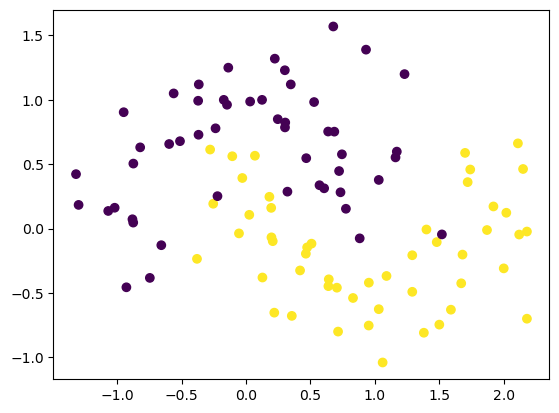

In [18]:
plt.scatter(x.values[:, 0], x.values[:, 1], c=y)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()

In [21]:
clf.fit(x,y)

LogisticRegression()

In [26]:
y_pred = clf.predict(x)

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

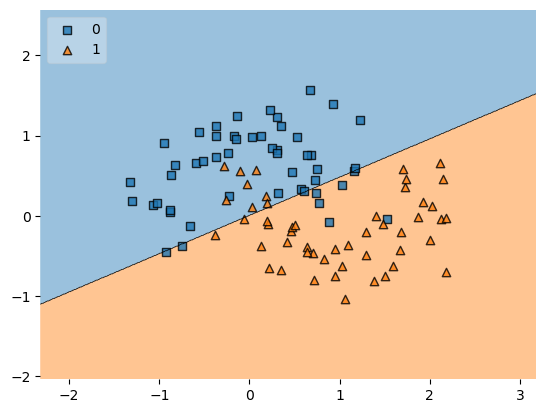

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values.astype('int'), clf=clf, legend=2)

In [30]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

0.8300000000000001

In [ ]:
# Can we improve this?
# The answer is yes

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)

In [32]:
x_trf = poly.fit_transform(x)

In [33]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=10))

0.9

In [42]:
def plot_decision_boundary(x,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    x_trf = poly.fit_transform(x)
    
    clf = LogisticRegression()
    clf.fit(x_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10))
    
    a = np.arange(start=x.values[:, 0].min() - 1, stop=x.values[:, 0].max() + 1, step=0.01)
    b = np.arange(start=x.values[:, 1].min() - 1, stop=x.values[:, 1].max() + 1, step=0.01)
    
    xx,yy = np.meshgrid(a,b)
    
    input_array = np.array([xx.ravel(),yy.ravel()]).T
    
    labels = clf.predict(poly.transform(input_array))
    
    plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.5)
    plt.scatter(x.values[:, 0], x.values[:, 1], c=y)
    plt.title('Degree = {}, Accuracy = {}'.format(degree,np.round(accuracy,4)))
    plt.show()

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


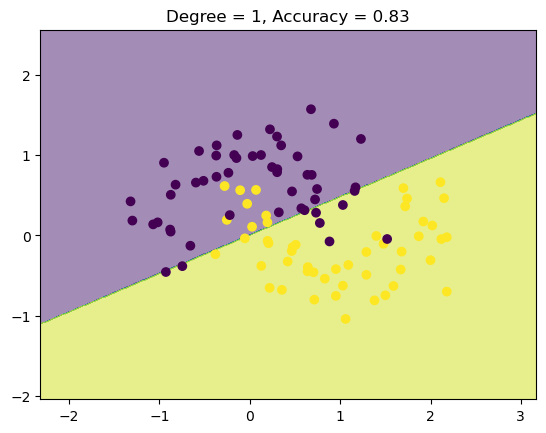

In [ ]:
plot_decision_boundary(x,y)
# For degree = 1

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


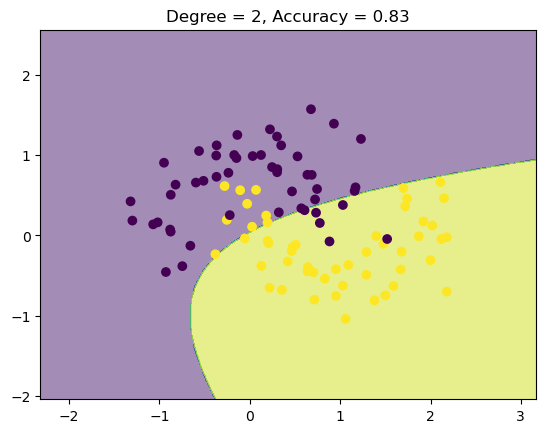

In [44]:
# For degree = 2
plot_decision_boundary(x,y,degree=2)

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


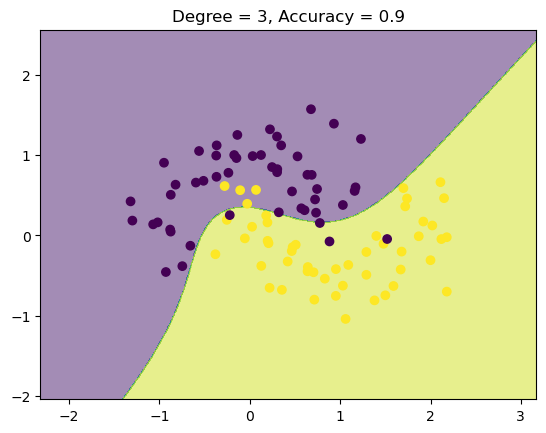

In [45]:
# For degree = 3
plot_decision_boundary(x,y,degree=3)

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


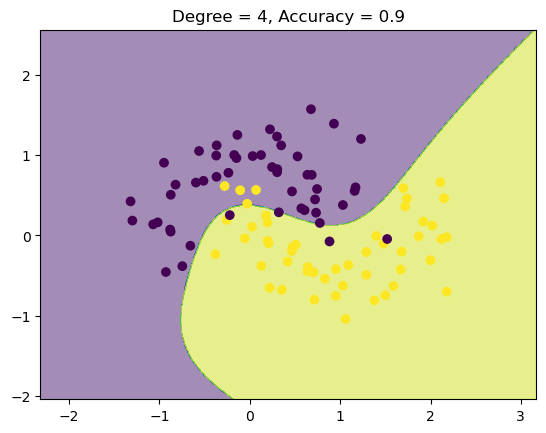

In [46]:
# For degree = 4
plot_decision_boundary(x,y,degree=4)

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


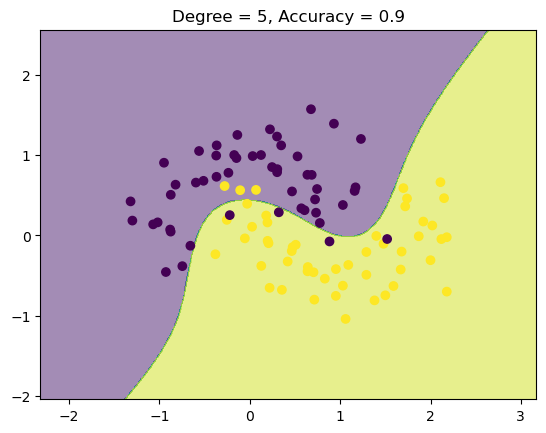

In [47]:
# For degree = 5
plot_decision_boundary(x,y,degree=5)

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


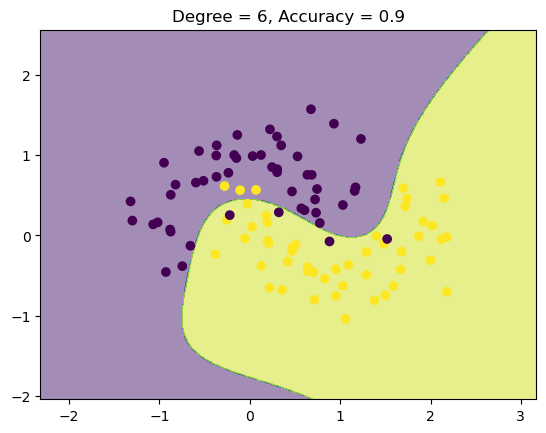

In [48]:
# For degree = 6
plot_decision_boundary(x,y,degree=6)

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


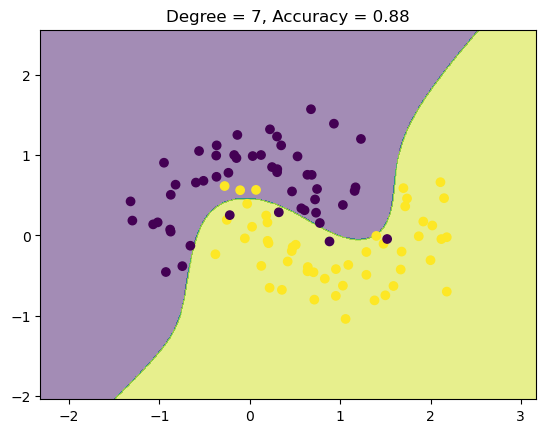

In [49]:
# For degree = 7
plot_decision_boundary(x,y,degree=7)

In [50]:
# Improvement at degree = 7 and will perform better on new data

c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

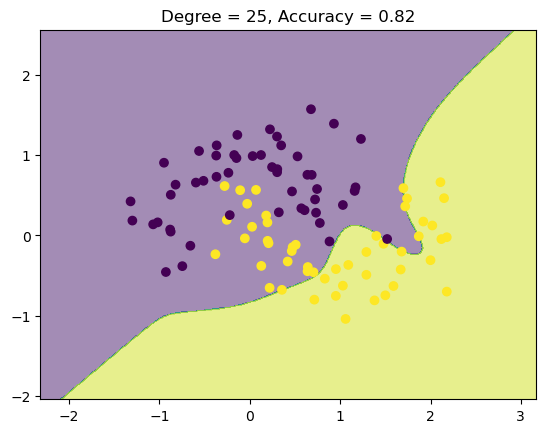

In [51]:
# For degree = 25
plot_decision_boundary(x,y,degree=25)

In [ ]:
# Here overfitting occurs

### INSIGHTS:
- Degree = 3 or Degree = 5 is the optimal degree for our data which gives us best result